In [23]:
import os
import rasterio
import torch
import numpy as np
import matplotlib.pyplot as plt
import kornia.augmentation as K
from typing import Dict, List
from torch import nn

In [24]:
class MinMaxScale(nn.Module):
    """Normalize channels to the range [0, 1] using min/max values."""

    def __init__(self, min: List[float], max: List[float]) -> None:
        super().__init__()
        self.min = torch.tensor(min)[:, None, None]
        self.max = torch.tensor(max)[:, None, None]
        self.denominator = self.max - self.min

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = inputs
        # Batch
        if x.ndim == 4:
            x = (x - self.min[None, ...]) / self.denominator[None, ...]
        # Sample
        else:
            x = (x - self.min) / self.denominator

        inputs = x.clamp(0, 1)
        return inputs
    
class MinMaxClamp(nn.Module):
    """Normalize channels to the range [0, 1] using min/max values."""

    def __init__(self, min: List[float], max: List[float]) -> None:
        super().__init__()
        self.min = torch.tensor(min)[:, None, None]
        self.max = torch.tensor(max)[:, None, None]

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = inputs
        inputs = torch.clamp(x, self.min, self.max)
        return inputs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9744 0 322.9496710000533 665.4630603561681
19.77362430102267 -1.282832139717361 -0.4334435431420712 1.407856605914444


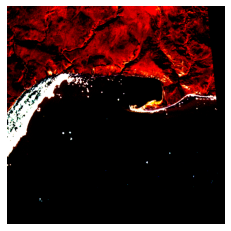

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0 -1.0 -0.5569032807892017 0.5351455707149188


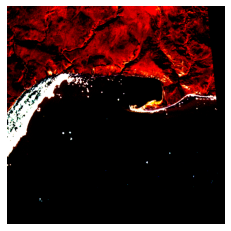

1.0 0.0 0.22154835960539918 0.2675727853574593


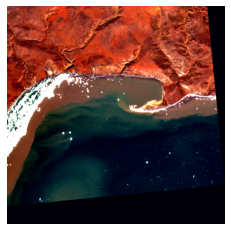

In [54]:
path = '../chopped_data/herschel/Herschel_Herschel_Island_2018-09-20_datacube_3.tif'

means = np.array([12.563786043752913, 117.29941220911088, 447.64719382044086, 595.8620172472806, 535.3712012658714, 1806.29808204889, 920.1094782110865])
stds = np.array([3.5185324647403644, 80.96723830709035, 470.13904303313586, 464.48946732700625, 476.7811733893084, 1034.8480903358773, 387.2689357063178])

transforms1 = torch.nn.Sequential(
    K.Normalize(means.astype(float), stds.astype(float))
#     ,MinMaxClamp(min=list(-np.ones(7)) , max=list(np.ones(7)))
#     ,MinMaxScale(list(np.zeros(7)), list(np.ones(7)))
        )
transforms2 = torch.nn.Sequential(
    K.Normalize(means.astype(float), stds.astype(float))
    ,MinMaxClamp(min=list(-np.ones(7)) , max=list(np.ones(7)))
#     ,MinMaxScale(list(np.zeros(7)), list(np.ones(7)))
        )
transforms3 = torch.nn.Sequential(
    K.Normalize(means.astype(float), stds.astype(float))
    ,MinMaxClamp(min=list(-np.ones(7)) , max=list(np.ones(7)))
    ,MinMaxScale(list(-np.ones(7)), list(np.ones(7)))
        )

with rasterio.open(path, 'r') as src:
        data = src.read()[1:,:,:]
        print(np.max(data[2:5]), np.min(data[2:5]), np.mean(data[2:5]), np.std(data[2:5]))

        # transform 1
        arr1 = transforms1(torch.from_numpy(data.astype(float)))[0]

        red = arr1[4,:,:]
        green = arr1[3,:,:]
        blue = arr1[2,:,:]
        rgb = np.stack((red, green, blue), axis=2)
        print(np.max(rgb), np.min(rgb), np.mean(rgb), np.std(rgb))
        plt.imshow(rgb.astype(np.float64))
        plt.axis('off')
        plt.show()
        
        # transform 2
        arr2 = transforms2(torch.from_numpy(data.astype(float)))[0]

        red = arr2[4,:,:]
        green = arr2[3,:,:]
        blue = arr2[2,:,:]
        rgb = np.stack((red, green, blue), axis=2)
        print(np.max(rgb), np.min(rgb), np.mean(rgb), np.std(rgb))
        plt.imshow(rgb.astype(np.float64))
        plt.axis('off')
        plt.show()
        
        # transform 3
        arr3 = transforms3(torch.from_numpy(data.astype(float)))[0]

        red = arr3[4,:,:]
        green = arr3[3,:,:]
        blue = arr3[2,:,:]
        rgb = np.stack((red, green, blue), axis=2)
        print(np.max(rgb), np.min(rgb), np.mean(rgb), np.std(rgb))
        plt.imshow(rgb.astype(np.float64))
        plt.axis('off')
        plt.show()